# Predecir sp500

In [2]:
import yfinance as yf
import pandas as pd
import os

In [3]:
if os.path.exists("^GSPC.csv"):
    sp500 = pd.read_csv("^GSPC.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("^GSPC.csv")

In [4]:
sp500.index = pd.to_datetime(sp500.index)

C:\Users\herie\AppData\Local\Temp\ipykernel_29252\318495744.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  sp500.index = pd.to_datetime(sp500.index)


In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-30 00:00:00-04:00,5726.520020,5765.140137,5703.529785,5762.479980,4425730000,0.0,0.0
2024-10-01 00:00:00-04:00,5757.729980,5757.729980,5681.279785,5708.750000,4025180000,0.0,0.0
2024-10-02 00:00:00-04:00,5698.140137,5719.629883,5674.000000,5709.540039,3829050000,0.0,0.0


<Axes: xlabel='Date'>

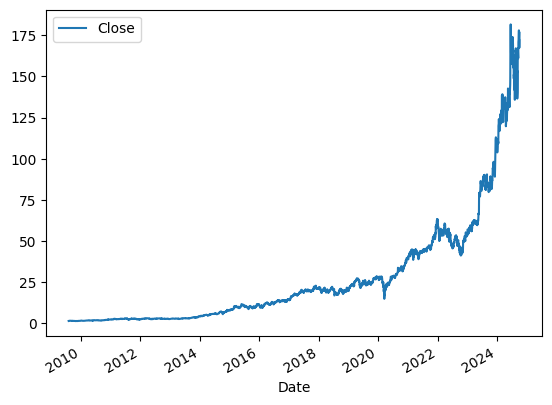

In [5]:
sp500.plot.line(y="Close", use_index=True)

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-09-30 00:00:00-04:00,5726.520020,5765.140137,5703.529785,5762.479980,4425730000,5708.750000
2024-10-01 00:00:00-04:00,5757.729980,5757.729980,5681.279785,5708.750000,4025180000,5709.540039
2024-10-02 00:00:00-04:00,5698.140137,5719.629883,5674.000000,5709.540039,3829050000,5699.939941


In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-09-30 00:00:00-04:00,5726.520020,5765.140137,5703.529785,5762.479980,4425730000,5708.750000,0
2024-10-01 00:00:00-04:00,5757.729980,5757.729980,5681.279785,5708.750000,4025180000,5709.540039,1
2024-10-02 00:00:00-04:00,5698.140137,5719.629883,5674.000000,5709.540039,3829050000,5699.939941,0


In [12]:
import pandas as pd

# Assuming sp500 is your DataFrame
# Convert the index to UTC before converting to datetime64
sp500.index = pd.to_datetime(sp500.index, utc=True)
sp500 = sp500.loc["1990-01-01":].copy()  # Perform the slicing operation
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 05:00:00+00:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 05:00:00+00:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 05:00:00+00:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 05:00:00+00:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 05:00:00+00:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-09-30 04:00:00+00:00,5726.520020,5765.140137,5703.529785,5762.479980,4425730000,5708.750000,0
2024-10-01 04:00:00+00:00,5757.729980,5757.729980,5681.279785,5708.750000,4025180000,5709.540039,1
2024-10-02 04:00:00+00:00,5698.140137,5719.629883,5674.000000,5709.540039,3829050000,5699.939941,0


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]   # Everything except the last 100 rows
test = sp500.iloc[-100:]    # The last 100 rows

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) # Train the model

RandomForestClassifier(min_samples_split=100, random_state=1)

In [11]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])     # Make predictions
preds = pd.Series(preds, index=test.index)  # Convert to a Series
precision_score(test["Target"], preds)      # Calculate precision

1.0

<Axes: xlabel='Date'>

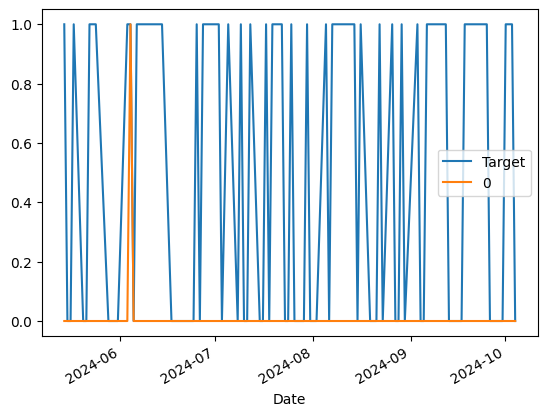

In [12]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [13]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [14]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [15]:
predictions = backtest(sp500, model, predictors)

In [16]:
predictions["Predictions"].value_counts()

Predictions
0    1037
1     280
Name: count, dtype: int64

In [17]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5642857142857143

In [18]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.536067
0    0.463933
Name: count, dtype: float64

In [19]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [20]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [21]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2013-07-29 04:00:00+00:00,2.726300,2.747146,2.708432,2.724066,13094000,2.743423,1,0.997410,0.0,0.990150,1.0,1.005820,36.0,1.060232,134.0,1.299757,530.0
2013-07-30 04:00:00+00:00,2.735978,2.754591,2.705455,2.743423,11651000,2.730767,0,1.003540,1.0,1.001304,2.0,1.010580,37.0,1.067566,135.0,1.308012,530.0
2013-07-31 04:00:00+00:00,2.755334,2.759057,2.721833,2.730767,13124000,2.784370,1,0.997688,1.0,0.997824,2.0,1.004049,36.0,1.062575,134.0,1.300989,530.0
2013-08-01 04:00:00+00:00,2.756824,2.793304,2.741934,2.784370,19499000,2.791070,1,1.009719,1.0,1.014650,2.0,1.021405,37.0,1.083250,135.0,1.325474,531.0
2013-08-02 04:00:00+00:00,2.776181,2.791070,2.749379,2.791070,15183000,2.756080,0,1.001202,2.0,1.013189,3.0,1.021916,37.0,1.085643,136.0,1.327620,531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30 04:00:00+00:00,171.869995,172.919998,169.630005,172.500000,16902000,167.470001,0,0.999450,0.0,0.987249,3.0,1.082598,31.0,1.335809,138.0,2.392326,529.0
2024-10-01 04:00:00+00:00,172.160004,172.250000,165.800003,167.470001,23770400,170.660004,1,0.985205,0.0,0.966615,2.0,1.051750,30.0,1.293363,138.0,2.318266,528.0
2024-10-02 04:00:00+00:00,167.550003,172.839996,167.020004,170.660004,14317800,171.889999,1,1.009434,1.0,0.990585,2.0,1.072019,31.0,1.314364,138.0,2.357964,528.0


In [22]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [24]:
predictions = backtest(sp500, model, new_predictors)

In [25]:
predictions["Predictions"].value_counts()

Predictions
0.0    280
1.0     37
Name: count, dtype: int64

In [26]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5405405405405406

In [27]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.536278
0    0.463722
Name: count, dtype: float64

In [28]:
predictions

,Target,Predictions
Date,,
2023-07-05 04:00:00+00:00,0,0.0
2023-07-06 04:00:00+00:00,0,0.0
2023-07-07 04:00:00+00:00,1,0.0
2023-07-10 04:00:00+00:00,1,0.0
2023-07-11 04:00:00+00:00,1,0.0
...,...,...
2024-09-30 04:00:00+00:00,0,0.0
2024-10-01 04:00:00+00:00,1,0.0
2024-10-02 04:00:00+00:00,1,0.0
